In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("C:/Users/Pritam Laskar/Documents/Projects/Adidas US Sales/Adidas US Sales Datasets.xlsx")

# Data Cleaning

In [3]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Unnamed: 13
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,NaN
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,NaN
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,NaN
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,NaN
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,NaN


In [4]:
df.shape

(9648, 14)

In [5]:
df['Unnamed: 13'].unique()

array([  nan, 9648.])

In [6]:
df.drop(columns = ['Unnamed: 13'], axis = 1, inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


### Retailer

In [10]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [11]:
df['Retailer'].value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

### Region

In [12]:
df['Region'].value_counts()

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64

### State

In [13]:
df['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

### City

In [14]:
df['City'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

### Product

In [15]:
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [16]:
df['Product'].value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

### Price per Unit

In [17]:
df['Price per Unit'].sample(15)

6349    42.0
8458    60.0
7709    38.0
6256    34.0
1888    55.0
7338    27.0
3035    10.0
8887    40.0
4099    67.0
9055    47.0
6669    29.0
3702    45.0
7340    33.0
4471    37.0
9359    18.0
Name: Price per Unit, dtype: float64

In [18]:
df['Price per Unit'] = df['Price per Unit'].astype(int)

### Total Sales

In [19]:
df['Total Sales'].sample(10)

9337      2250.0
1234     62500.0
6433      2646.0
6637      2014.0
6976      2030.0
7241      1368.0
5545      5166.0
9090      2784.0
1279    318750.0
3612     15000.0
Name: Total Sales, dtype: float64

In [20]:
df['Total Sales'].unique()

array([600000., 500000., 400000., ...,   4902.,   5664.,   8784.])

### Operating Profit

In [21]:
df['Operating Profit'].sample(15)

6369      6954.00
2595     72000.00
3384     21000.00
5727      2548.52
6775       728.50
27      148750.00
2820      8750.00
9298       844.80
4992      3175.20
6763       992.64
859      74250.00
5949      3066.12
6520      2778.30
5552      3256.11
3065     13125.00
Name: Operating Profit, dtype: float64

In [22]:
df['Operating Profit'].unique()

array([300000.  , 150000.  , 140000.  , ...,   1377.6 ,   2791.28,
          649.89])

### Operating Margin

In [23]:
df['Operating Margin'].sample(15)

7920    0.54
1325    0.25
5495    0.48
8099    0.55
3055    0.50
665     0.30
3473    0.40
3404    0.40
1832    0.50
1404    0.30
1203    0.35
9169    0.39
6558    0.52
4454    0.47
3411    0.35
Name: Operating Margin, dtype: float64

### Sales Method

In [24]:
df['Sales Method'].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64

In [25]:
df.drop(columns = ['Retailer ID', 'Invoice Date'], axis = 1, inplace = True)

In [26]:
df.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.182214,256.930037,93273.437500,34425.244761,0.422991
std,14.698080,214.252030,141916.016727,54193.113713,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


### Outlier Removal

In [27]:
columns = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

Q3 = df[columns].quantile(.75)
Q1 = df[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

for column in columns:
    df[column] = np.where(df[column] > UL[column], UL[column], np.where(df[column] < LL[column], LL[column], df[column]))

In [28]:
df.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.110075,250.061049,85622.729296,30347.700358,0.422852
std,14.467906,194.996976,119783.371296,41689.117154,0.096645
min,7.000000,0.000000,0.000000,0.000000,0.140000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,85.000000,716.000000,368618.250000,127273.621250,0.700000


In [29]:
df.dtypes

Retailer             object
Region               object
State                object
City                 object
Product              object
Price per Unit      float64
Units Sold          float64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
dtype: object

In [30]:
df['Operating Profit'] = df['Operating Profit'].round(2)
df['Operating Margin'] = df['Operating Margin'].round(2)

In [31]:
df['Price per Unit'] = df['Price per Unit'].astype(int)
df['Units Sold'] = df['Units Sold'].astype(int)
df['Total Sales'] = df['Total Sales'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Region            9648 non-null   object 
 2   State             9648 non-null   object 
 3   City              9648 non-null   object 
 4   Product           9648 non-null   object 
 5   Price per Unit    9648 non-null   int32  
 6   Units Sold        9648 non-null   int32  
 7   Total Sales       9648 non-null   int32  
 8   Operating Profit  9648 non-null   float64
 9   Operating Margin  9648 non-null   float64
 10  Sales Method      9648 non-null   object 
dtypes: float64(2), int32(3), object(6)
memory usage: 716.2+ KB


# Univariate and Multivariate Analysis

### Univariate Analysis

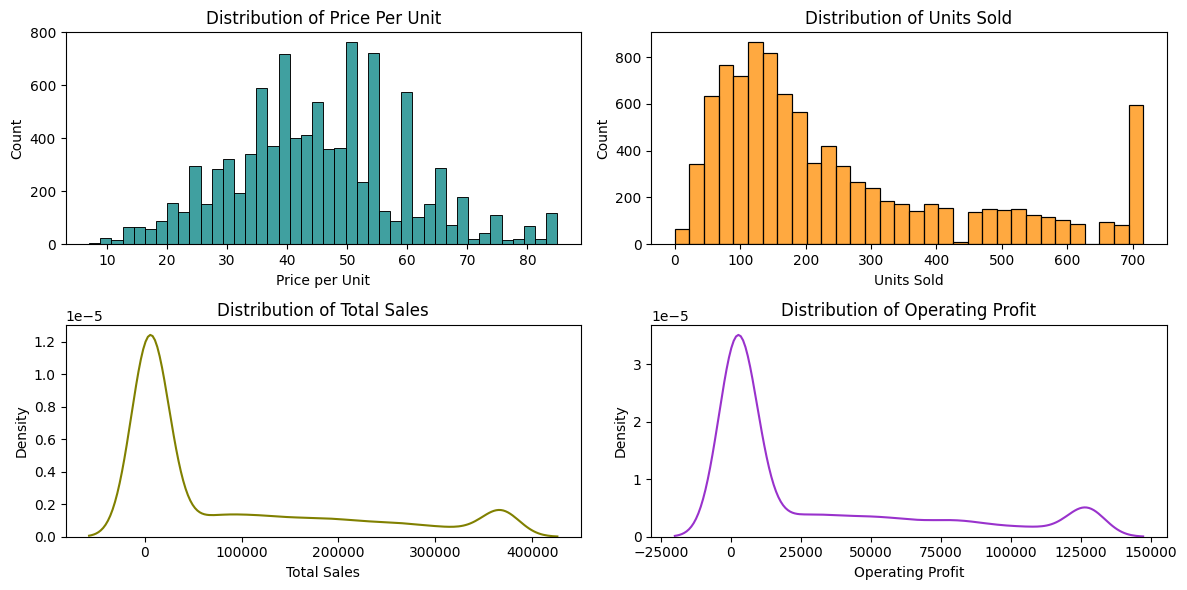

In [33]:
# Distributions

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))

# Subplot 1: Price Per Unit
sns.histplot(data = df, x = 'Price per Unit', color = 'teal', ax=axes[0,0])
axes[0,0].set_title('Distribution of Price Per Unit');

# Subplot 2: Units Sold
sns.histplot(data = df, x = 'Units Sold', color = 'darkorange', ax=axes[0,1])
axes[0,1].set_title('Distribution of Units Sold');

# Subplot 3: Total Sales 
sns.kdeplot(data = df, x = 'Total Sales', color = 'olive', ax=axes[1,0])
axes[1,0].set_title('Distribution of Total Sales');

# Subplot 4: Operating Profit
sns.kdeplot(data = df, x = 'Operating Profit', color = 'darkorchid', ax=axes[1,1])
axes[1,1].set_title('Distribution of Operating Profit');

plt.tight_layout()
plt.show()

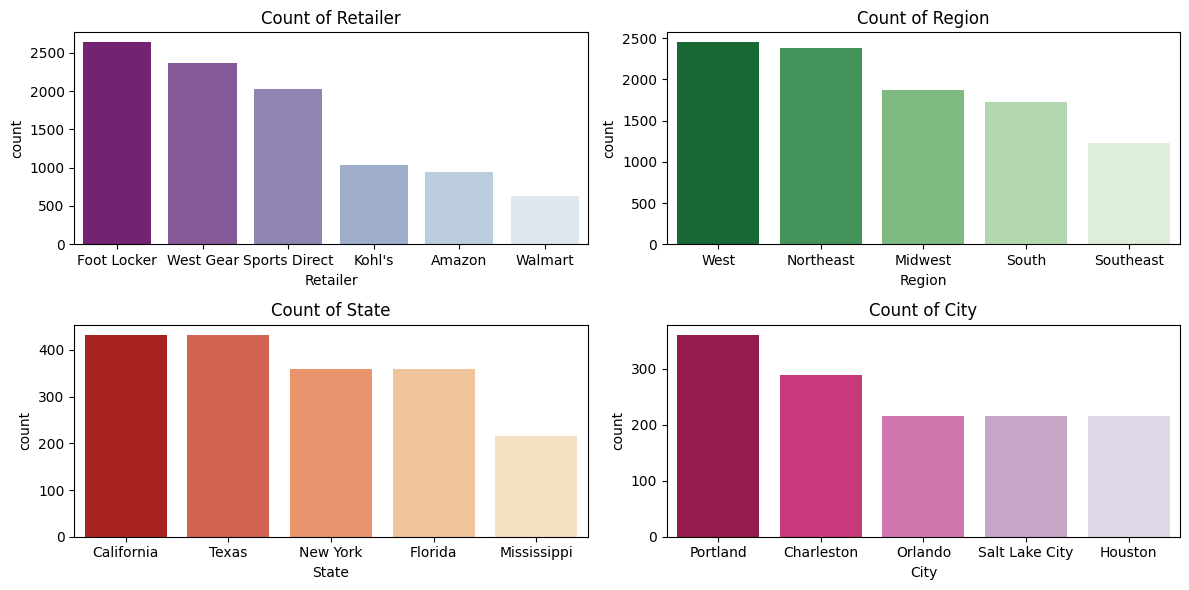

In [34]:
# Countplots

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))

# Subplot 1: Retailer
order_retailer = df['Retailer'].value_counts(ascending = False)
sns.countplot(data = df, x = 'Retailer', palette = 'BuPu_r', ax=axes[0,0], order = order_retailer.index)
axes[0,0].set_title('Count of Retailer');

# Subplot 2: Region
order_region = df['Region'].value_counts(ascending = False)
sns.countplot(data = df, x = 'Region', palette = 'Greens_r', ax=axes[0,1], order = order_region.index)
axes[0,1].set_title('Count of Region');

# Subplot 3: State 
order1 = df['State'].value_counts(ascending = False).head(5)
sns.countplot(data = df, x = 'State', palette = 'OrRd_r', ax=axes[1,0], order = order1.index)
axes[1,0].set_title('Count of State');

# Subplot 4: Operating Profit
order2 = df['City'].value_counts(ascending = False).head(5)
sns.countplot(data = df, x = 'City', palette = 'PuRd_r', ax=axes[1,1], order = order2.index)
axes[1,1].set_title('Count of City');

plt.tight_layout()
plt.show()

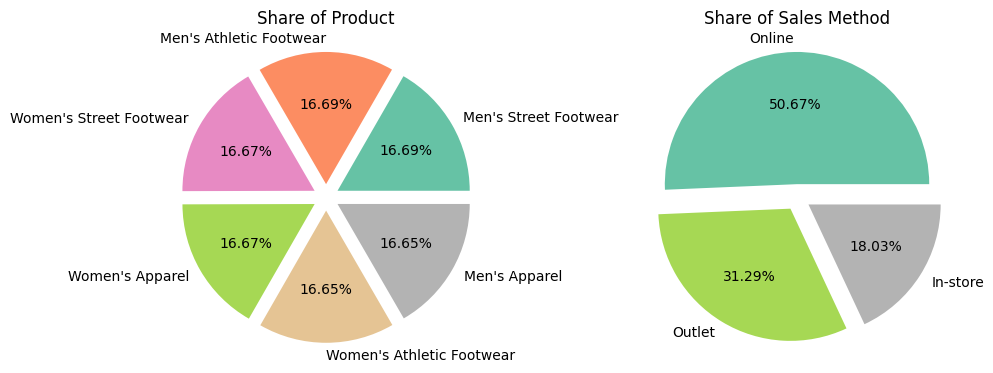

In [35]:
# Pie

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))

# Subplot 1: Product
df['Product'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', ax=axes[0], explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
axes[0].set_title('Share of Product');
axes[0].set_ylabel('');

# Subplot 2: Sales Method
df['Sales Method'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', ax=axes[1], explode = [0.1, 0.1, 0.1])
axes[1].set_title('Share of Sales Method');
axes[1].set_ylabel('');

plt.tight_layout()
plt.show()

### Bivariate and Multivariate Analysis

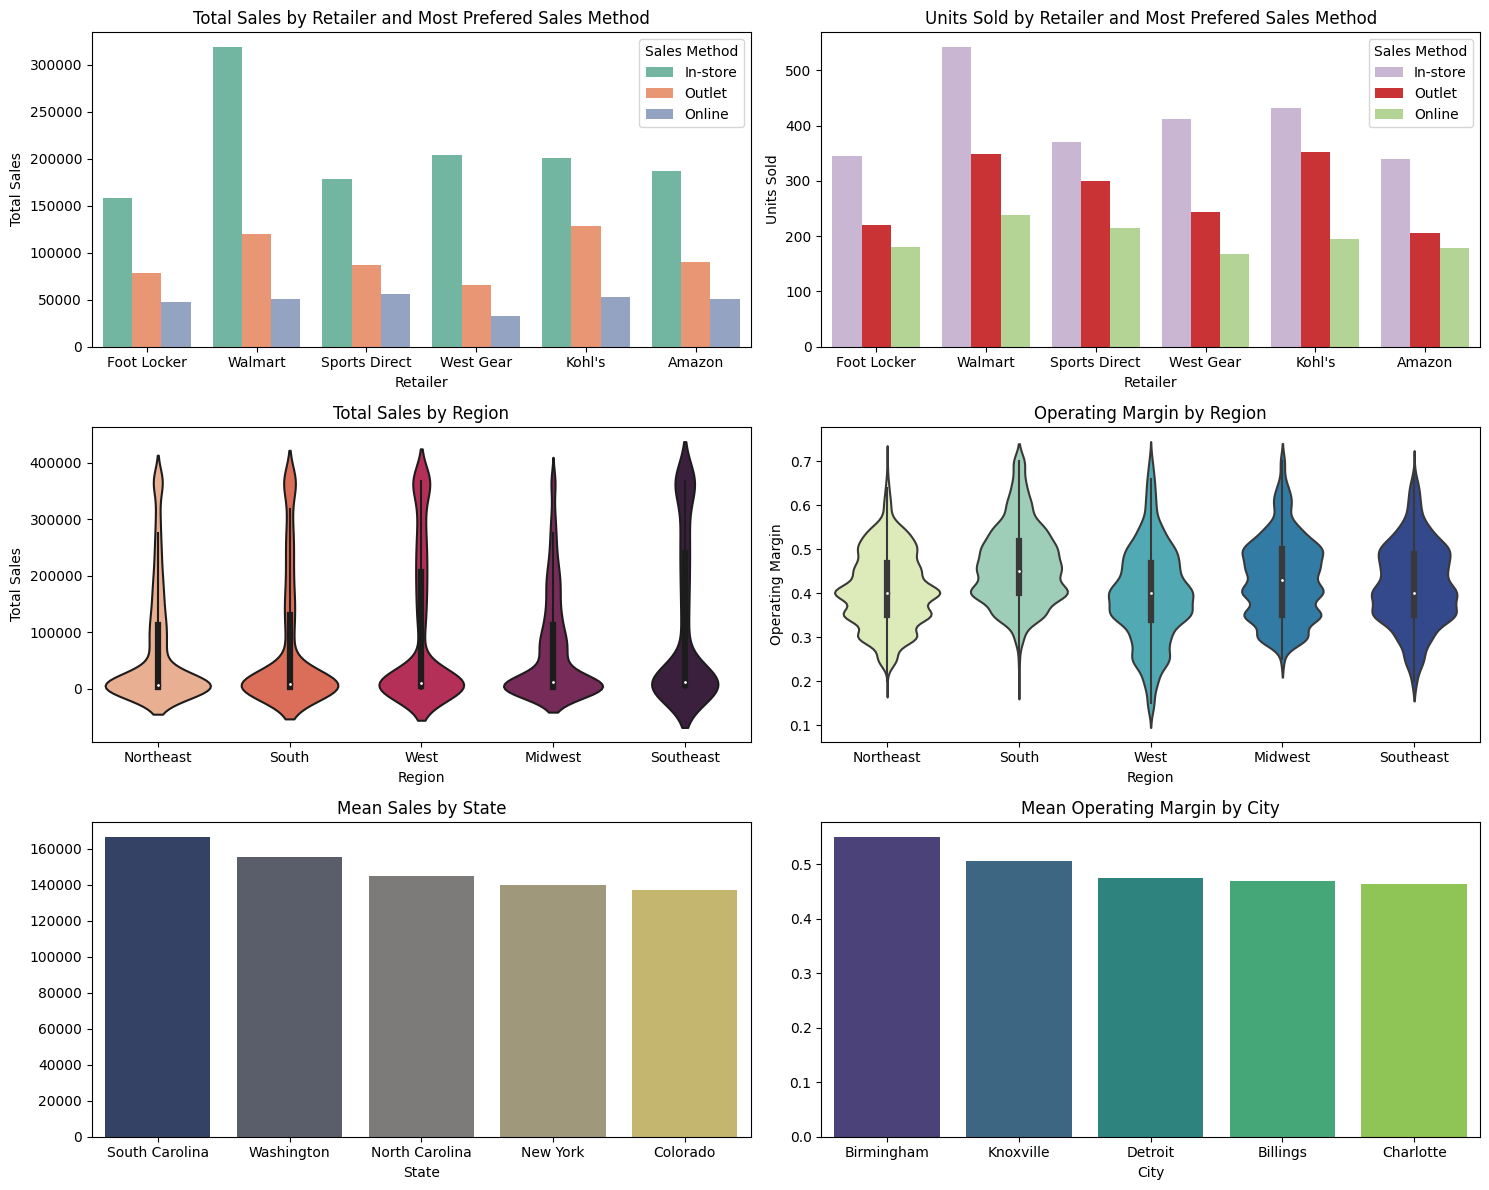

In [36]:
# Barplots

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,12))

# Subplot 1: Retailer vs Total Sales
sns.barplot(data = df, x = 'Retailer', y = 'Total Sales', hue = 'Sales Method', palette = 'Set2', ax=axes[0,0], errorbar = None)
axes[0,0].set_title('Total Sales by Retailer and Most Prefered Sales Method');

# Subplot 2: Retailer vs Units Sold
sns.barplot(data = df, x = 'Retailer', y = 'Units Sold', hue = 'Sales Method', palette = 'Paired_r', ax=axes[0,1], errorbar = None)
axes[0,1].set_title('Units Sold by Retailer and Most Prefered Sales Method');

# Subplot 3: Region vs Total Sales
sns.violinplot(data = df, x = 'Region', y = 'Total Sales', palette = 'rocket_r', ax=axes[1,0])
axes[1,0].set_title('Total Sales by Region');

# Subplot 4: Region vs Operating Profit
sns.violinplot(data = df, x = 'Region', y = 'Operating Margin', palette = 'YlGnBu', ax=axes[1,1])
axes[1,1].set_title('Operating Margin by Region');

# Subplot 5: State vs Total Sales
a = df.groupby(['State'])['Total Sales'].mean().sort_values(ascending = False).head(5)
sns.barplot(data = df, x = a.index, y = a.values, palette = 'cividis', ax=axes[2,0], errorbar = None)
axes[2,0].set_title('Mean Sales by State');

# Subplot 6: City vs Operating Margin
b = df.groupby(['City'])['Operating Margin'].mean().sort_values(ascending = False).head(5)
sns.barplot(data = df, x = b.index, y = b.values, palette = 'viridis', ax=axes[2,1], errorbar = None)
axes[2,1].set_title('Mean Operating Margin by City');

plt.tight_layout()
plt.show()

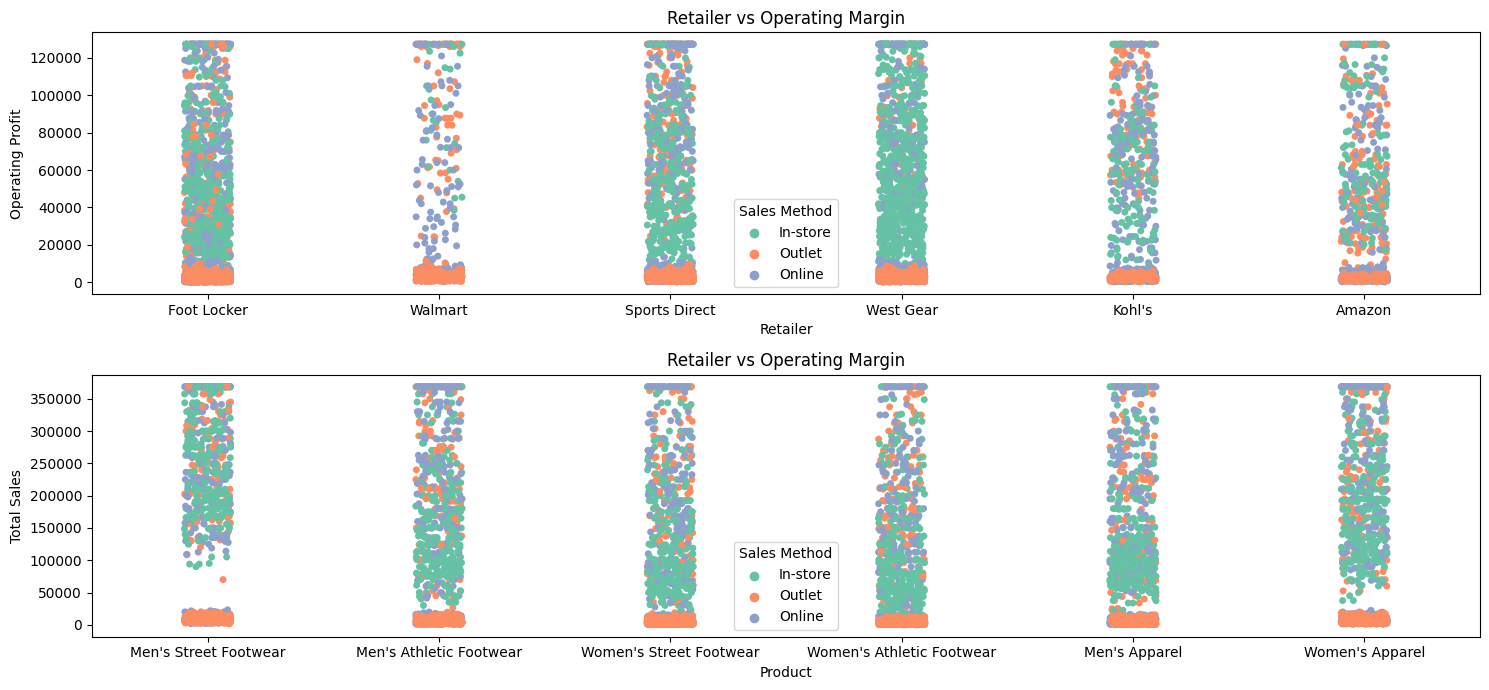

In [37]:
# Stripplots

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,7))

# Subplot 1: Retailer vs Operating Profit
sns.stripplot(data = df, x = 'Retailer', y = 'Operating Profit', hue = 'Sales Method', ax=axes[0], palette = 'Set2');
axes[0].set_title('Retailer vs Operating Margin');

# Subplot 2: Product vs Total Sales
sns.stripplot(data = df, x = 'Product', y = 'Total Sales', hue = 'Sales Method', ax=axes[1], palette = 'Set2');
axes[1].set_title('Retailer vs Operating Margin');

plt.tight_layout()
plt.show()

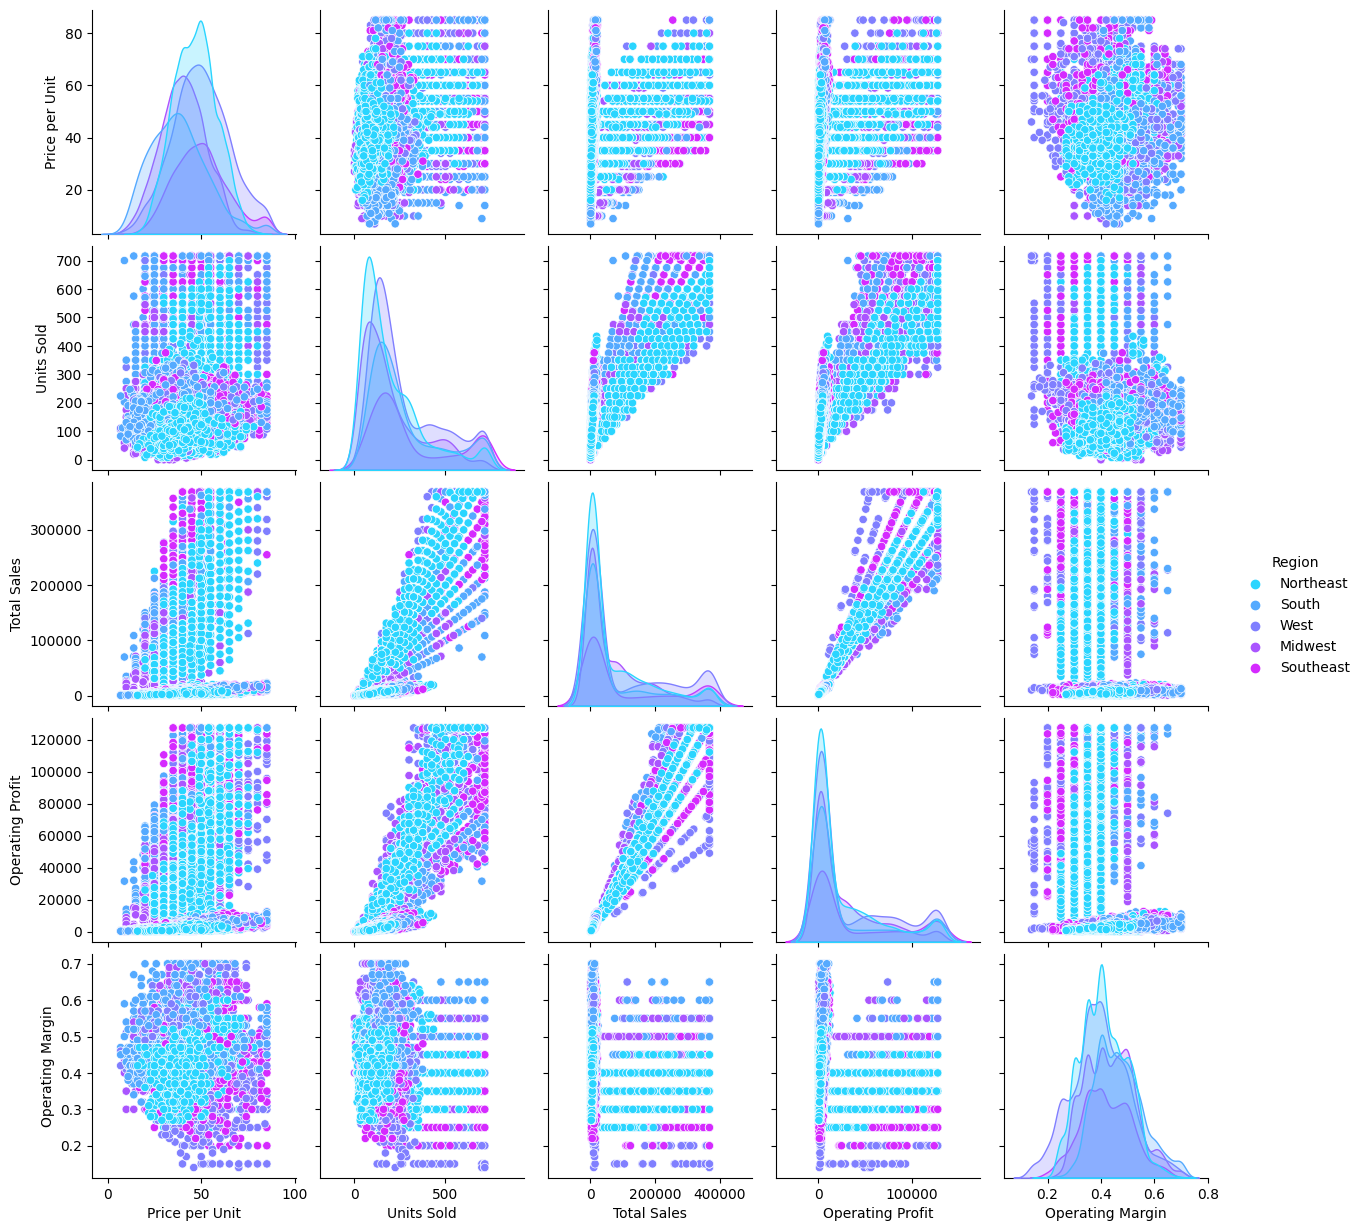

In [38]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(data = df, hue = 'Region', palette = 'cool');